# 安徽安庆市项目`WRF-CMAQ`模拟分析
## Check `distributive-MEIC` spatial distribution

---
*@author: Evan*\
*@date: 2023-03-30*

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.io.shapereader import Reader

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

## 读取数据

In [2]:
meic = xr.open_dataset('F:/Data/case_anqing/newCMAQ/emission/download/emis.CN3AH_135X138.ncf')
grid = xr.open_dataset('F:/Data/case_anqing/GRIDCRO2D_2023021.nc')

In [3]:
meic

<xarray.Dataset>
Dimensions:  (TSTEP: 25, VAR: 74, DATE-TIME: 2, LAY: 8, ROW: 138, COL: 135)
Dimensions without coordinates: TSTEP, VAR, DATE-TIME, LAY, ROW, COL
Data variables: (12/75)
    TFLAG    (TSTEP, VAR, DATE-TIME) int32 ...
    NO2      (TSTEP, LAY, ROW, COL) float32 ...
    NO       (TSTEP, LAY, ROW, COL) float32 ...
    HONO     (TSTEP, LAY, ROW, COL) float32 ...
    CO       (TSTEP, LAY, ROW, COL) float32 ...
    SO2      (TSTEP, LAY, ROW, COL) float32 ...
    ...       ...
    PTI      (TSTEP, LAY, ROW, COL) float32 ...
    PMN      (TSTEP, LAY, ROW, COL) float32 ...
    PH2O     (TSTEP, LAY, ROW, COL) float32 ...
    PMOTHR   (TSTEP, LAY, ROW, COL) float32 ...
    PMC      (TSTEP, LAY, ROW, COL) float32 ...
    NH3      (TSTEP, LAY, ROW, COL) float32 ...
Attributes: (12/33)
    IOAPI_VERSION:  ioapi-3.1: $Id:: init3.F 321 2016-02-26 16:00:20Z coats  ...
    EXEC_ID:        CMAQ_CCTMv533_sysu_fq_1_20230401_030919_674941066        ...
    FTYPE:          1
    CDATE:          2023092
    CTIME:          3552
    WDATE:          2023092
    ...             ...
    VGLVLS:         [1.    0.995 0.992 0.98  0.96  0.95  0.93  0.91  0.89 ]
    GDNAM:          CN3AH_135X138   
    UPNAM:          LIUEMIS         
    VAR-LIST:       NO2             NO              HONO            CO       ...
    FILEDESC:       
    HISTORY:

In [4]:
lat = np.squeeze(grid.LAT)
lon = np.squeeze(grid.LON)

NO2 = meic.NO2[:,0,:,:].mean(dim='TSTEP')
NO = meic.NO[:,0,:,:].mean(dim='TSTEP')
CO = meic.CO[:,0,:,:].mean(dim='TSTEP')
SO2 = meic.SO2[:,0,:,:].mean(dim='TSTEP')
ISOP = meic.ISOP[:,0,:,:].mean(dim='TSTEP')
ALK1 = meic.ALK1[:,0,:,:].mean(dim='TSTEP')

In [5]:
shp_urban = Reader('F:/Data/case_anqing/shapefile/Anqing_urban/urban.shp')
shp_rural = Reader('F:/Data/case_anqing/shapefile/Anqing_rural/rural.shp')
shp_aq = Reader('F:/Data/case_anqing/shapefile/Anqing_district/anqing_district.shp')
shp_pro = Reader('F:/shapefile/shp_for_ArcGis/ChinaAdminDivisonSHP-master/2. Province/province.shp')

In [6]:
def ax_shp1(ax,proj,shp_pro,shp_urban,shp_rural,extent,interval):
    ax.add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='gray',facecolor='None'), linewidth=0.8)
    ax.add_feature(cfeat.ShapelyFeature(shp_urban.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=0.5)
    ax.add_feature(cfeat.ShapelyFeature(shp_rural.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=0.5)

    gl=ax.gridlines(
        xlocs=np.arange(-180, 180 + 1, interval), ylocs=np.arange(-90, 90 + 1, interval),
        draw_labels=True, x_inline=False, y_inline=False,
        linewidth=0, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels =False
    gl.rotate_labels=False

    ax.set_extent(extent,proj) # d03
    
    return ax
    
def ax_shp2(ax,proj,shp_pro,shp_aq,extent,interval):
    ax.add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='gray',facecolor='None'), linewidth=0.8)
    ax.add_feature(cfeat.ShapelyFeature(shp_aq.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=0.5)

    gl=ax.gridlines(
        xlocs=np.arange(-180, 180 + 1, interval), ylocs=np.arange(-90, 90 + 1, interval),
        draw_labels=True, x_inline=False, y_inline=False,
        linewidth=0, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels =False
    gl.rotate_labels=False

    ax.set_extent(extent,proj) # d03
    
    return ax


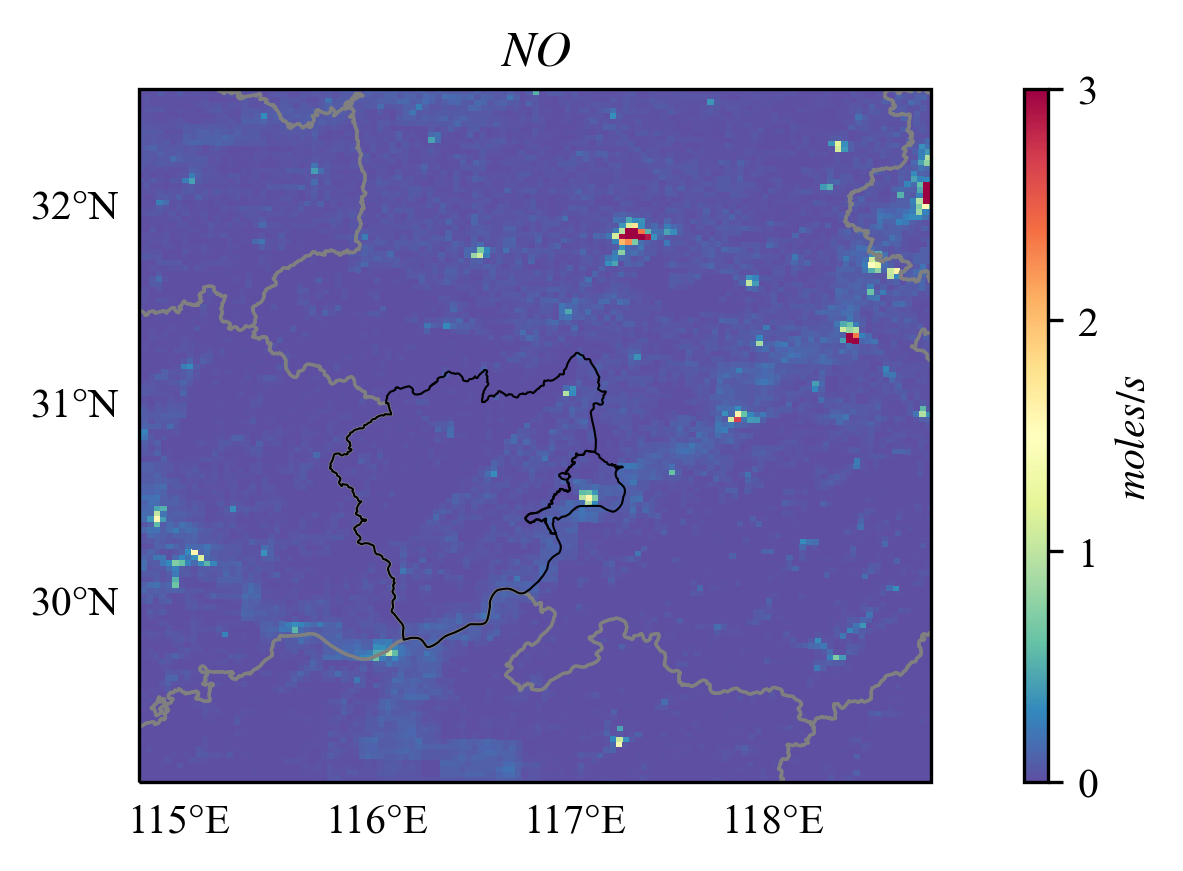

In [10]:
cmax=3+1
cmaplevel=np.arange(0,cmax,0.1)
proj=ccrs.PlateCarree()

fig = plt.figure(figsize=(4,3),dpi=300)
ax = fig.subplots(1,1,subplot_kw={'projection':proj})

extent = [114.8, 118.8, 29.1, 32.6]
interval = 1
ax_shp1(ax,proj,shp_pro,shp_urban,shp_rural,extent,interval)

# contour map
# cmap=ax.contourf(lon,lat,NO[:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')
cmap=ax.pcolormesh(lon,lat,NO[:,:],transform=proj,cmap='Spectral_r',vmin=0,vmax=3)

# share colorbar
fig.subplots_adjust(right=0.9,wspace=0.02)
position= fig.add_axes([0.92,0.11,0.02,0.77])
cbar=fig.colorbar(cmap,cax=position)
cbar.set_ticks(np.arange(0,cmax+1,1))
cbar.set_label('$moles/s$')

ax.set_title('$NO$')

plt.show()

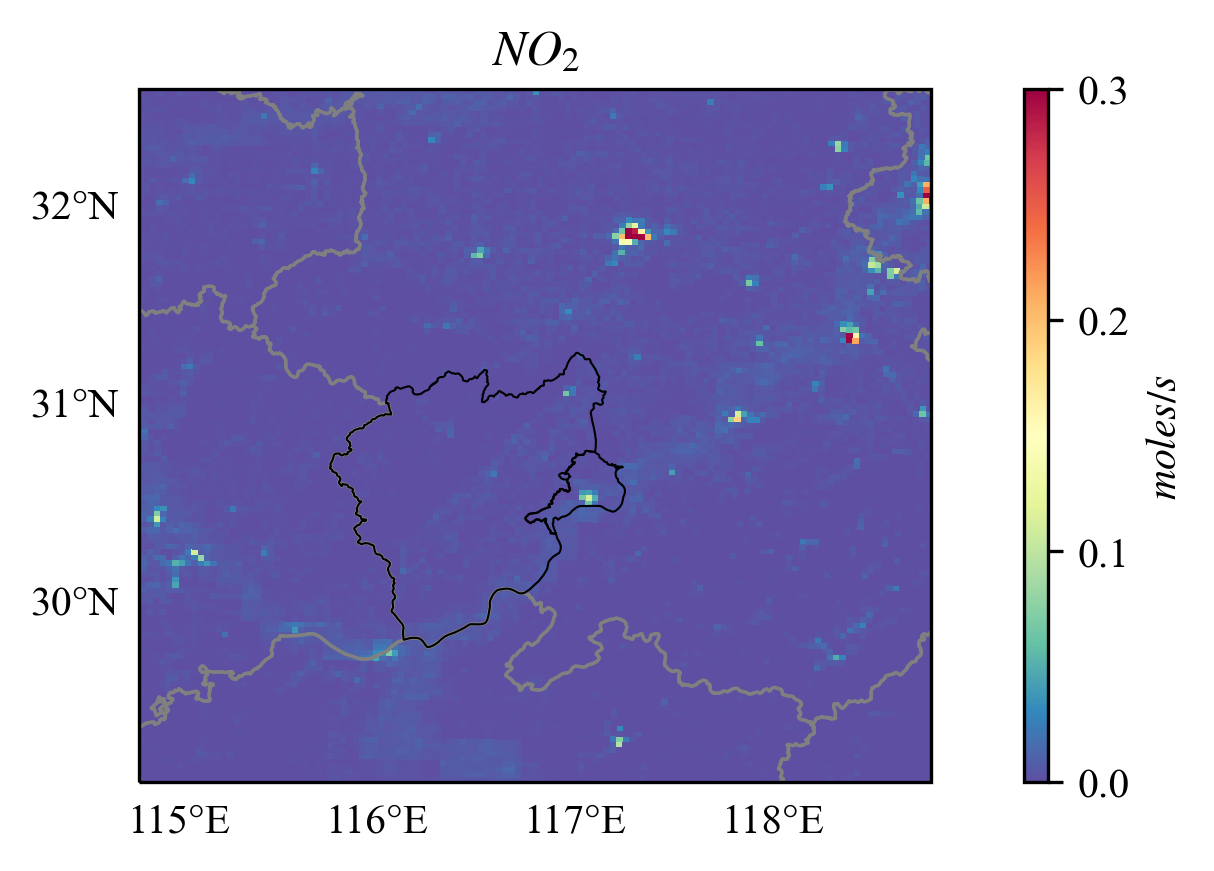

In [11]:
cmax=0.3
cmaplevel=np.arange(0,cmax,0.01)
proj=ccrs.PlateCarree()

fig = plt.figure(figsize=(4,3),dpi=300)
ax = fig.subplots(1,1,subplot_kw={'projection':proj})

extent = [114.8, 118.8, 29.1, 32.6]
interval = 1
ax_shp1(ax,proj,shp_pro,shp_urban,shp_rural,extent,interval)

# contour map
# cmap=ax.contourf(lon,lat,NO[:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')
cmap=ax.pcolormesh(lon,lat,NO2[:,:],transform=proj,cmap='Spectral_r',vmin=0,vmax=cmax)

# share colorbar
fig.subplots_adjust(right=0.9,wspace=0.02)
position= fig.add_axes([0.92,0.11,0.02,0.77])
cbar=fig.colorbar(cmap,cax=position)
cbar.set_ticks(np.arange(0,cmax+0.01,0.1))
cbar.set_label('$moles/s$')

ax.set_title('$NO_2$')

plt.show()

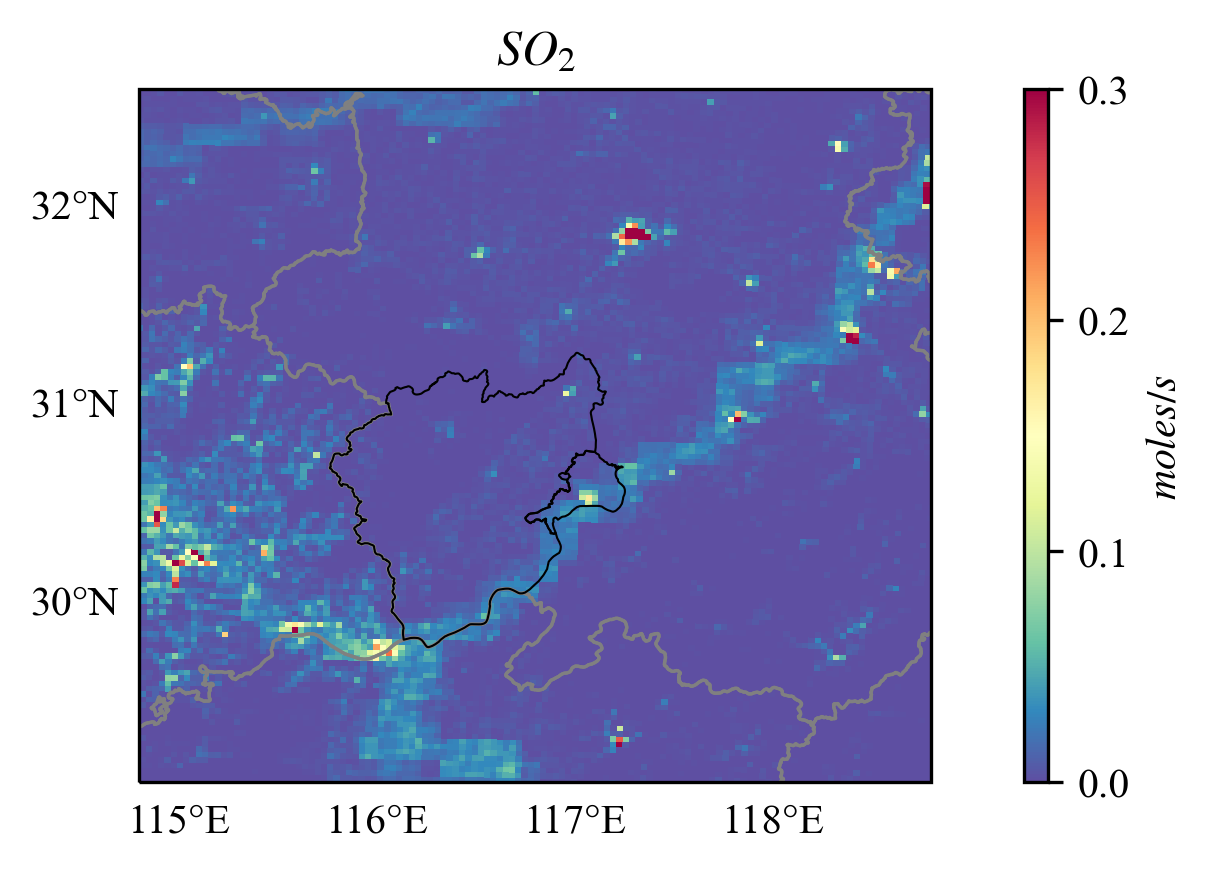

In [12]:
cmax=0.3
cmaplevel=np.arange(0,cmax,0.01)
proj=ccrs.PlateCarree()

fig = plt.figure(figsize=(4,3),dpi=300)
ax = fig.subplots(1,1,subplot_kw={'projection':proj})

extent = [114.8, 118.8, 29.1, 32.6]
interval = 1
ax_shp1(ax,proj,shp_pro,shp_urban,shp_rural,extent,interval)

# contour map
# cmap=ax.contourf(lon,lat,NO[:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')
cmap=ax.pcolormesh(lon,lat,SO2[:,:],transform=proj,cmap='Spectral_r',vmin=0,vmax=cmax)

# share colorbar
fig.subplots_adjust(right=0.9,wspace=0.02)
position= fig.add_axes([0.92,0.11,0.02,0.77])
cbar=fig.colorbar(cmap,cax=position)
cbar.set_ticks(np.arange(0,cmax+0.01,0.1))
cbar.set_label('$moles/s$')

ax.set_title('$SO_2$')

plt.show()

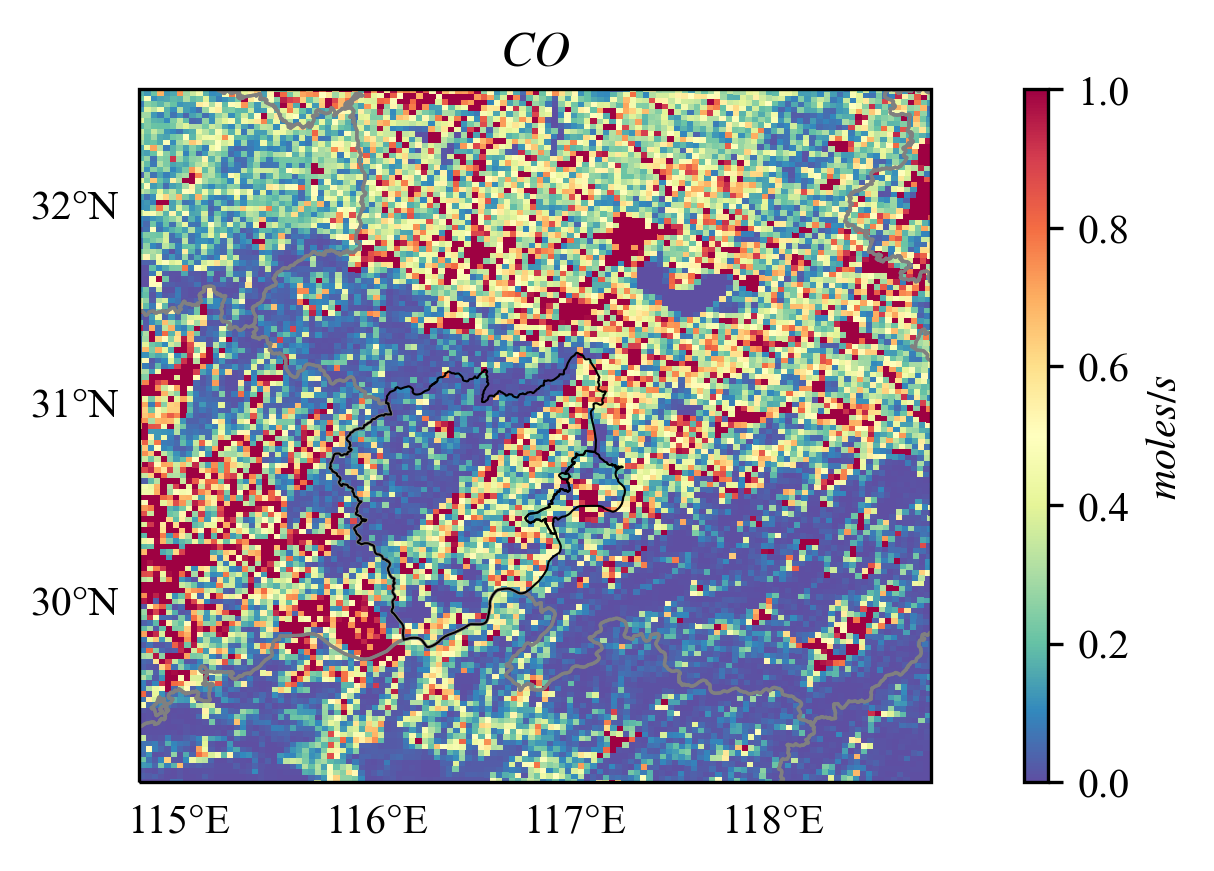

In [13]:
cmax=1
cmaplevel=np.arange(0,cmax,0.01)
proj=ccrs.PlateCarree()

fig = plt.figure(figsize=(4,3),dpi=300)
ax = fig.subplots(1,1,subplot_kw={'projection':proj})

extent = [114.8, 118.8, 29.1, 32.6]
interval = 1
ax_shp1(ax,proj,shp_pro,shp_urban,shp_rural,extent,interval)

# contour map
# cmap=ax.contourf(lon,lat,NO[:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')
cmap=ax.pcolormesh(lon,lat,CO[:,:],transform=proj,cmap='Spectral_r',vmin=0,vmax=cmax)

# share colorbar
fig.subplots_adjust(right=0.9,wspace=0.02)
position= fig.add_axes([0.92,0.11,0.02,0.77])
cbar=fig.colorbar(cmap,cax=position)
cbar.set_ticks(np.arange(0,cmax+0.01,0.2))
cbar.set_label('$moles/s$')

ax.set_title('$CO$')

plt.show()

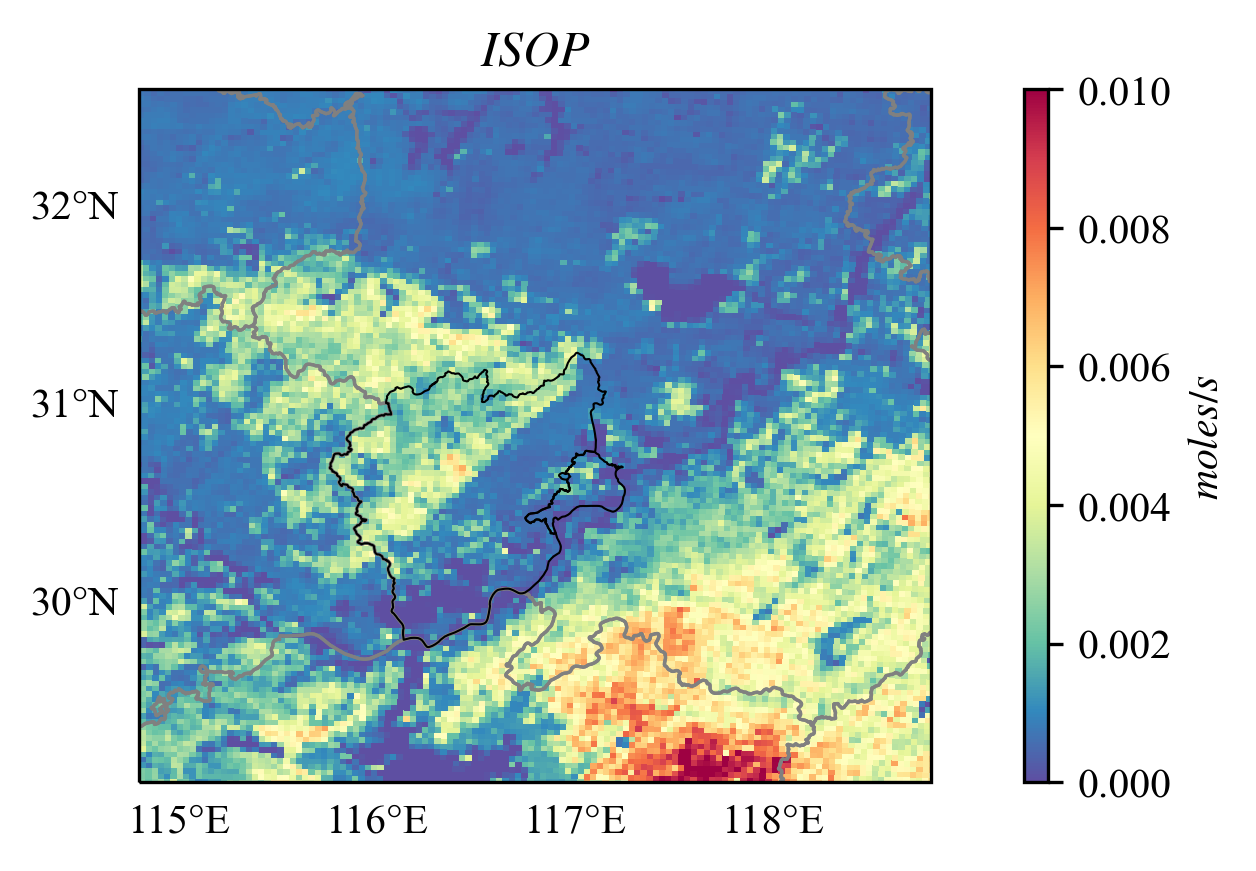

In [14]:
cmax=0.01
cmaplevel=np.arange(0,cmax,0.0005)
proj=ccrs.PlateCarree()

fig = plt.figure(figsize=(4,3),dpi=300)
ax = fig.subplots(1,1,subplot_kw={'projection':proj})

extent = [114.8, 118.8, 29.1, 32.6]
interval = 1
ax_shp1(ax,proj,shp_pro,shp_urban,shp_rural,extent,interval)

# contour map
# cmap=ax.contourf(lon,lat,NO[:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')
cmap=ax.pcolormesh(lon,lat,ISOP[:,:],transform=proj,cmap='Spectral_r',vmin=0,vmax=cmax)

# share colorbar
fig.subplots_adjust(right=0.9,wspace=0.02)
position= fig.add_axes([0.92,0.11,0.02,0.77])
cbar=fig.colorbar(cmap,cax=position)
cbar.set_ticks(np.arange(0,cmax+0.01,0.002))
cbar.set_label('$moles/s$')

ax.set_title('$ISOP$')

plt.show()

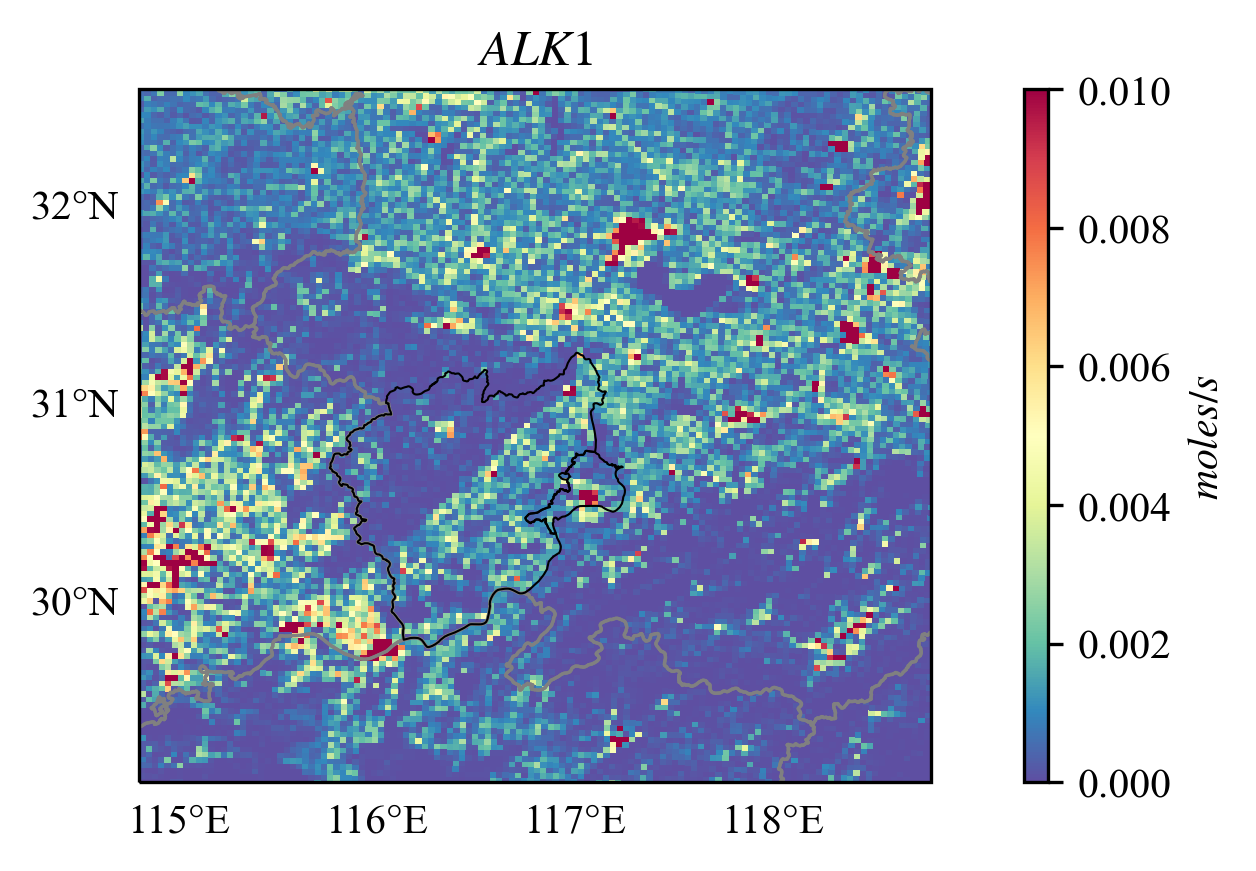

In [15]:
cmax=0.01
cmaplevel=np.arange(0,cmax,0.0005)
proj=ccrs.PlateCarree()

fig = plt.figure(figsize=(4,3),dpi=300)
ax = fig.subplots(1,1,subplot_kw={'projection':proj})

extent = [114.8, 118.8, 29.1, 32.6]
interval = 1
ax_shp1(ax,proj,shp_pro,shp_urban,shp_rural,extent,interval)

# contour map
# cmap=ax.contourf(lon,lat,NO[:,:],transform=proj,cmap='Spectral_r',levels=cmaplevel,extend='both')
cmap=ax.pcolormesh(lon,lat,ALK1[:,:],transform=proj,cmap='Spectral_r',vmin=0,vmax=cmax)

# share colorbar
fig.subplots_adjust(right=0.9,wspace=0.02)
position= fig.add_axes([0.92,0.11,0.02,0.77])
cbar=fig.colorbar(cmap,cax=position)
cbar.set_ticks(np.arange(0,cmax+0.01,0.002))
cbar.set_label('$moles/s$')

ax.set_title('$ALK1$')

plt.show()